# Linear Regression with one variable
In this session, You will implement <strong>Linear Regression with one variable </strong> to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

#### Instruction:
* Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

#### You will learn to:
* How load the data using <strong>pandas</strong>.
* How plot 2D data.
* Build a simple linear regression model with one variable
 * Compute MSE cost
 * Gradient descent
* Visualize cost function

## 1 - Import modules

* pandas: Mostly used for work with data. For example, in this exercise, we will load the data with pandas.
* numpy: is the fundamental package for scientific computing(specially working with matrix) with Python.
* matplotlib: is a famous library to plot graphs in Python.

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## 2 - Loading the data
You will implement "load_data" function to load a data from "path" a seperate the data to X and Y. <br>
In the "ex1data1.txt", the first column is the population of a city and the second column is the profit of a food truck in that city. <br>
Do not forget to add a column for bias to X matrix.

In [14]:
def load_data(path):
    """
    loading the data
    
    Arguments:
    path -- A string indicate the data file path.
    
    Return:
    data -- A 97*2 numpy array, contains all the data including X and Y, without adding a column of ones
    X -- A 97*2 numpy array, contains the X data(population), with adding a column of ones.
    Y - A 97*1 numpy array, contains the Y data(profit)
    """
    
    data_pd = pd.read_csv(path, header = None)
    data = data_pd.values
    X_inital = data[:,0].reshape(-1,1)
    X = np.append(np.ones((X_inital.shape[0],1)) , X_inital, axis = 1) # Add a column of ones to x

    Y = data[:,1].reshape(-1,1)
    
    return data, X, Y



data, X, Y = load_data("ex1data1.txt")

m = X.shape[0]
dim = X.shape[1]

In [15]:
print('data shape:', data.shape)
print('X shpae:', X.shape)
print('Y shape:', Y.shape)
print('m:', m)
print('dim:', dim)

data shape: (97, 2)
X shpae: (97, 2)
Y shape: (97, 1)
m: 97
dim: 2


#### Expected output: <br>
data shape: (97, 2) <br>
X shpae: (97, 2) <br>
Y shape: (97, 1) <br>
m: 97 <br>
dim: 2 <br>

## 3 - Visualizing the data
Before starting on any task, it is often useful to understand the data by visualizing it. <br>
since In this specific exercise we have only one variable, We can visualize the data with a 2 dimensional plot. Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.

note that X contains two columns, the first column is the ones column and we do not need to plot this column.

Text(0, 0.5, 'Population of City in 10,000s')

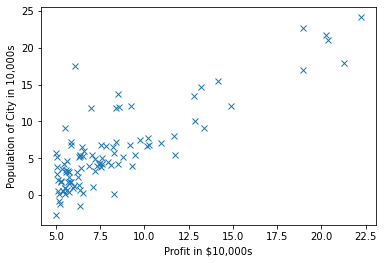

In [16]:
plt.plot(X[:,1],Y,'x', markersize=6)
plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")

## 4 - Initializing parameters
For start, we can set the theta to a zero numpy array and set the number of iteration to 1500 and learning rate to 0.01.
note that theta should be in (number_of_columns * 1) shape.

In [17]:
theta = np.zeros((dim,1))
iteration = 1500
alpha = 0.01

## 5 - computing the cost
The objective of linear regression is to minimize the cost function.
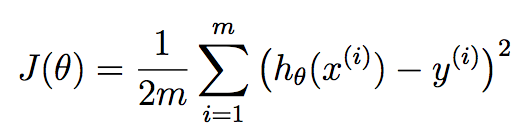
<br><br>
Where the hypothesis is :
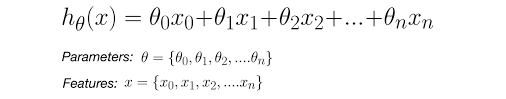

In [18]:
def compute_cost(X,Y, theta):
    """
    coputing the MSE cost fucntion
    
    Arguments:
    X --- the X matrix, including a column of ones in the first column and the population in the second column
    Y --- the Y matrix, including the proftis in one column
    theta --- theta matrix
    
    Return:
    J --- cost value in regards to X,Y and theta
    """
    
    m = X.shape[0]
    J = 0

    h = np.dot(X, theta)
    J = (1/(2*m)) * np.sum(np.power(h-Y,2))
    return J

In [19]:
print(compute_cost(X,Y,theta))
print(compute_cost(X,Y,[[-1], [2]]))

32.072733877455676
54.24245508201238


expected outputs are 32.07 and 54.24

## 6 - Gradient descent
Recall that the parameters of your model are the theta values. These are the values you will adjust to minimize cost J(theta). One way to do this is to use the batch gradient descent algorithm.
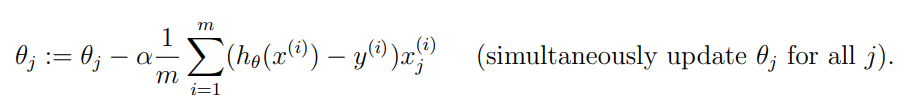
Note that it is important to update all the theta values simultaneosly. <br>
With each step of gradient descent, your parameters θj come closer to the optimal values that will achieve the lowest cost J(θ).

In [20]:
def gradient_descent(X, Y, theta, alpha, iteration):
    """
    run the batch gradient descent algorithm on the data
    
    Arguments:
    X --- the X matrix, including a column of ones in the first column and the population in the second column
    Y --- the Y matrix, including the proftis in one column
    theta --- theta matrix
    alpha --- learning rate
    iteration --- maximum number of running the algorithm
    
    Return:
    theta --- new values of theta with a low cost value
    history --- an array which contains cost value of each iteration
    """
    
    m = X.shape[0]
    history = np.zeros(iteration)
    
    for i in range(iteration):
        
        h = np.dot(X, theta)

        gradJ = (1/m) * np.dot(X.T, h-Y)
        theta = theta - alpha * gradJ
        
        history[i] = compute_cost(X, Y, theta)
        
    return theta, history

theta, history = gradient_descent(X, Y, theta, alpha, iteration)

In [21]:
print(theta)

[[-3.63029144]
 [ 1.16636235]]


expected output:<br> [[-3.63029144] <br>
 [ 1.16636235]]

##  7- visualize cost function and predicted line
Lastly, we can visualize the cost function of each iteration(stored in "history"). <br>
We can see that cost value reduced in each iteration.

Text(0, 0.5, 'Cost')

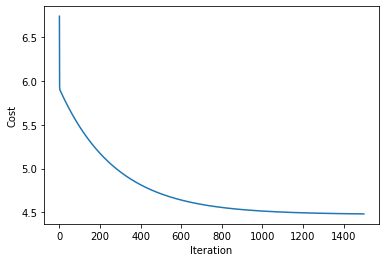

In [22]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Cost")

And now, we can draw the predicted line.

Text(0, 0.5, 'Population of City in 10,000s')

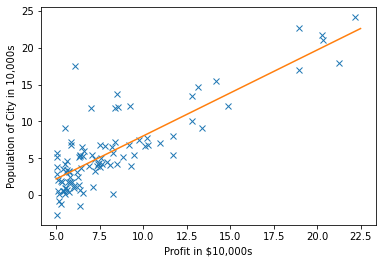

In [23]:
plt.plot(X[:,1],Y,'x', markersize=6)

xt = np.linspace(5,22.5,100)
yt = theta[0] + theta[1] * xt
plt.plot(xt,yt)

plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")

# Todo List:
* (check) linear regression with multiple variables
* (check) feature normalization
* testing different learning rate
* normal equations